In [41]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# naming the columns for the dataframes
columns = ['z(km)', 'p(mb)', 'T(°C)', 'air density(m-3)', 'o3(m-3)', 'o2(m-3)', 'h2o(m-3)', 'co2(m-3)', 'no2(m-3)']

In [43]:
# import data
trop = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglt.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns)
midsum = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglms.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns)
midwin = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglmw.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns)
subarcs = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglss.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns)
subarcw = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglsw.dat', delimiter=r"\s+", engine="python", skiprows=2, names=columns) 

In [44]:
# converting kelvin to celsius and cm-3 to m-3
for file in [trop, midsum, midwin, subarcs, subarcw]:
    file['T(°C)'] = file['T(°C)'] - 273.15 
    file['air density(m-3)'] = file['air density(m-3)'] / 1000000 
    file['o3(m-3)'] = file['o3(m-3)'] / 1000000
    file['o2(m-3)'] = file['o2(m-3)'] / 1000000
    file['h2o(m-3)'] = file['h2o(m-3)'] / 1000000
    file['co2(m-3)'] = file['co2(m-3)'] / 1000000
    file['no2(m-3)'] = file['no2(m-3)'] / 1000000

In [45]:
trop.head()

,z(km),p(mb),T(°C),air density(m-3),o3(m-3),o2(m-3),h2o(m-3),co2(m-3),no2(m-3)
0,120.0,0.00002,106.85,428855.2,0.000211,30631.25,0.084500,14.7875,0.000064
1,115.0,0.00004,26.55,870016.7,0.004353,81836.40,0.208944,34.8240,0.000135
2,110.0,0.00006,-31.55,1939631.0,0.097050,232920.00,0.543480,116.4600,0.000309
3,105.0,0.00013,-61.15,4441394.0,0.889000,622300.00,1.511300,488.9500,0.000729
4,100.0,0.00029,-82.45,10976380.0,4.392000,1756800.00,4.392000,2141.1000,0.001867


In [46]:
# functions for the graphs, yes i know i could just make one with more args but i prefer it this way

def pressure(file, title):
    plt.figure(figsize=(5,5))
    plt.plot(file['p(mb)'],file['z(km)'], markersize = 1)
    plt.xlabel("pressure (mb)")
    plt.ylabel("height (km)")
    plt.title(label=title)
    plt.grid()
    
def temp(file,title):
    plt.figure(figsize=(5,5))
    plt.plot(file['T(°C)'],file['z(km)'], markersize = 1)
    plt.xlabel("temperature(°C)")
    plt.ylabel("height (km)")
    plt.title(label=title)
    plt.grid()
    
def gases(file,filegas,xlabel,title):
    plt.figure(figsize=(5,5))
    plt.plot(filegas,file['z(km)'], markersize = 1)
    plt.xlabel(xlabel)
    plt.ylabel("height (km)")
    plt.title(label=title)
    plt.grid()
    
def distribution(file,fraction, ylim, xlabel, title):
    plt.figure(figsize=(5,5))
    plt.plot(fraction,file['z(km)'], markersize = 1)
    plt.ylim(0,ylim)
    plt.xlabel(xlabel)
    plt.ylabel("height (km)")
    plt.title(label=title)
    plt.grid()

In [47]:
# Integration function that returns a list containing the 6 values of total amount of each atmospheric variable 

def integration(file):
    variables = ['air density(m-3)', 'o3(m-3)', 'o2(m-3)', 'h2o(m-3)', 'co2(m-3)', 'no2(m-3)']
    result = []
    for i in variables:
        total = 1000 * np.trapz(file[i], file['z(km)'])   
        result.append(total)

    return result

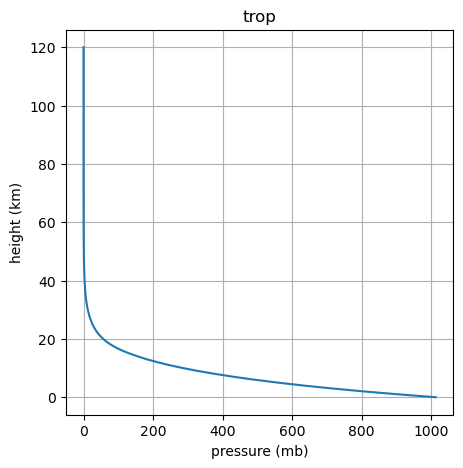

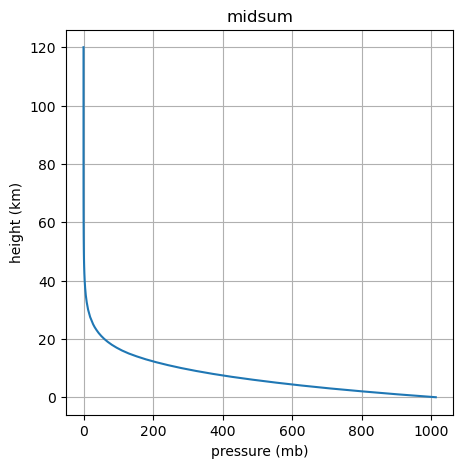

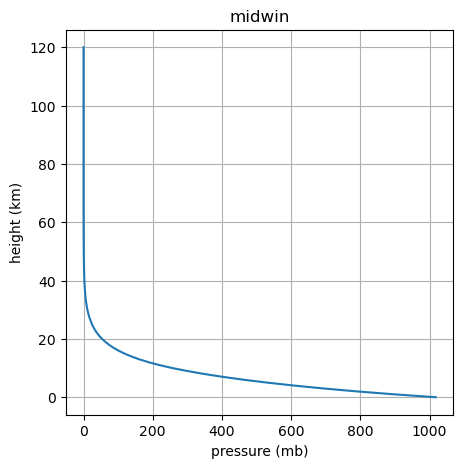

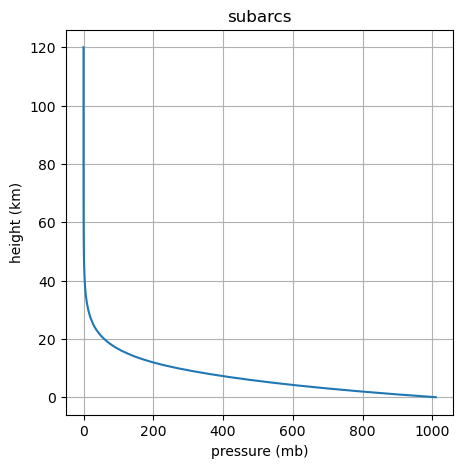

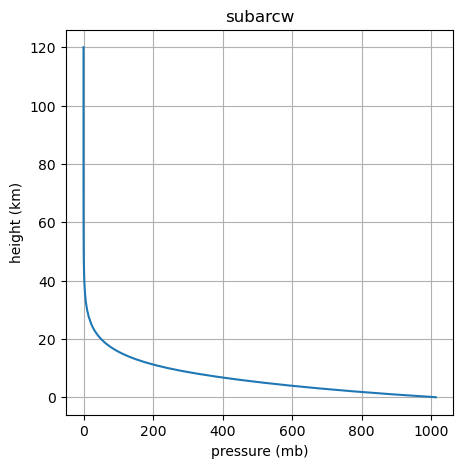

In [48]:
# pressure graphs -> exponential graph

pressure(trop,"trop")
pressure(midsum,'midsum')
pressure(midwin, 'midwin')
pressure(subarcs, 'subarcs')
pressure(subarcw, 'subarcw')

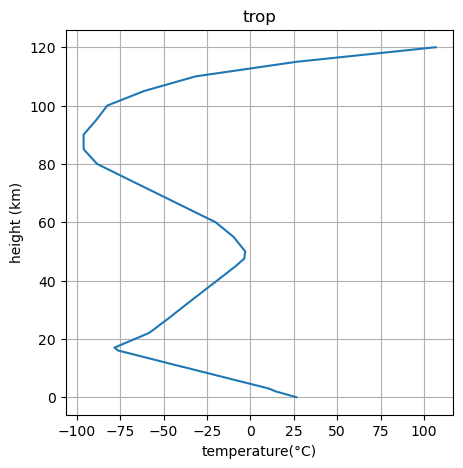

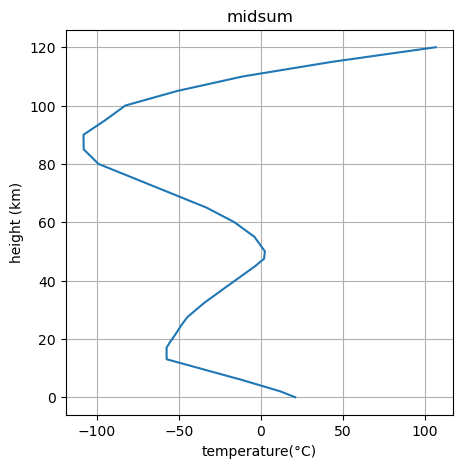

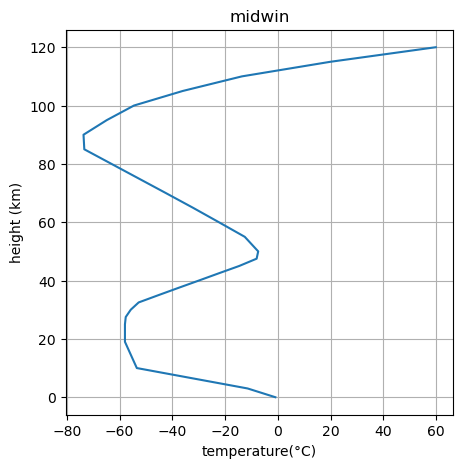

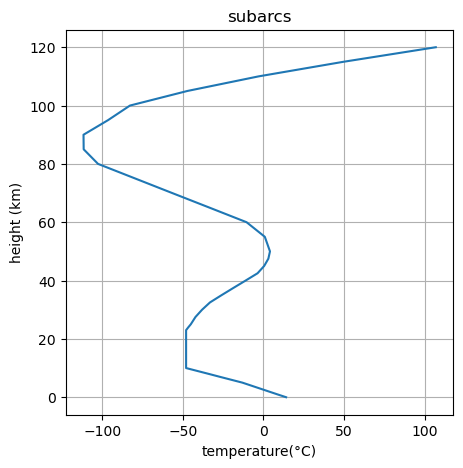

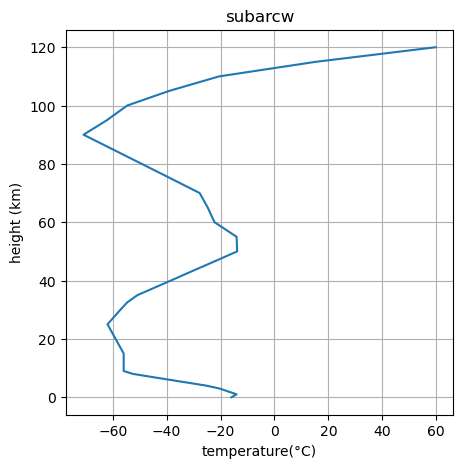

In [49]:
# temperature graphs -> they show where the tropopause is 

temp(trop,"trop")
temp(midsum,'midsum')
temp(midwin, 'midwin')
temp(subarcs, 'subarcs')
temp(subarcw, 'subarcw')

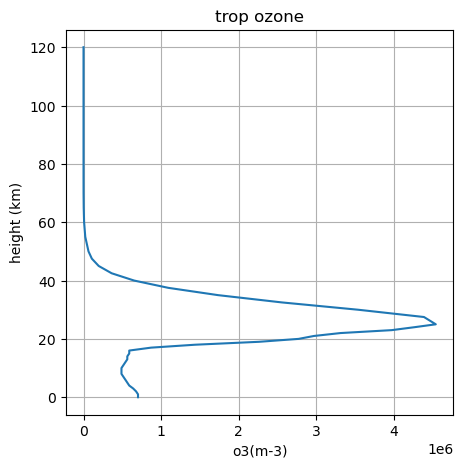

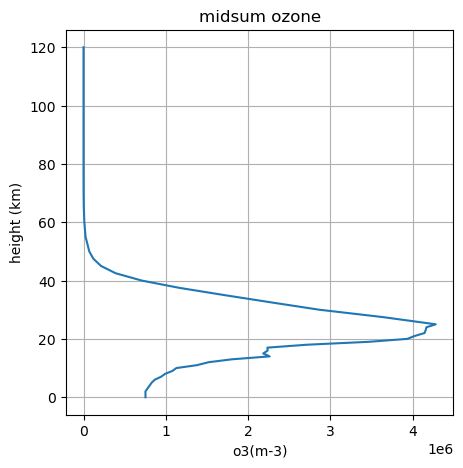

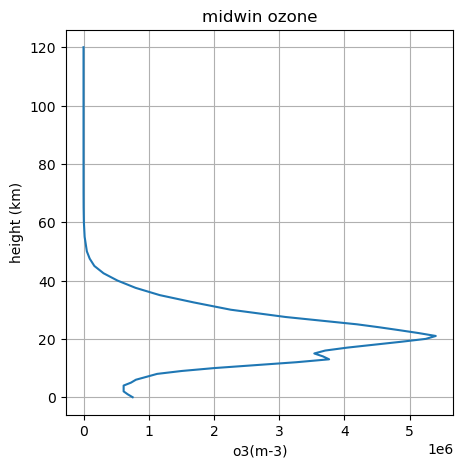

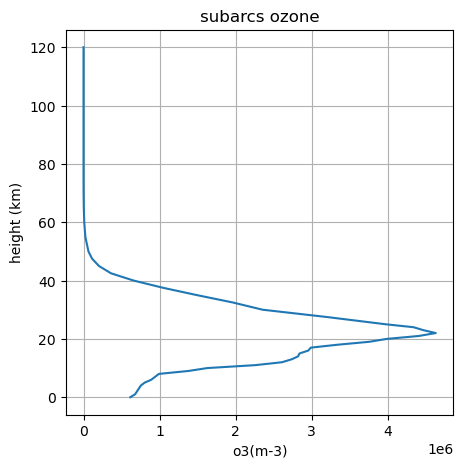

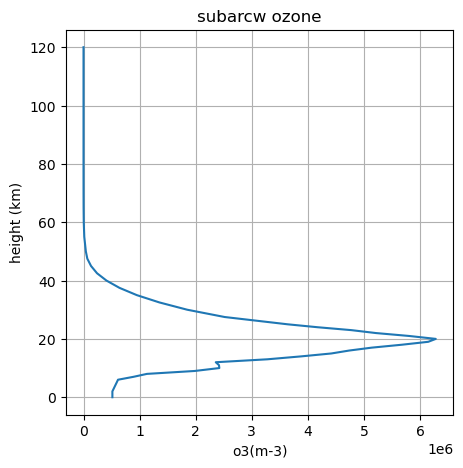

In [50]:
# ozone -> Total ozone is generally lowest at the equator and highest in polar regions.During spring, 
#total ozone exhibits maximums at latitudes poleward of about 45° N in the Northern Hemisphere
#and between 45° and 60° S in the Southern Hemisphere. These spring maximums are a result of increased transport 
#of ozone from its source region in the tropics toward high latitudes during late autumn and winter.

gases(trop, trop['o3(m-3)'],'o3(m-3)', "trop ozone")
gases(midsum, midsum['o3(m-3)'], 'o3(m-3)', 'midsum ozone')
gases(midwin, midwin['o3(m-3)'], 'o3(m-3)', 'midwin ozone')
gases(subarcs, subarcs['o3(m-3)'], 'o3(m-3)', 'subarcs ozone')
gases(subarcw, subarcw['o3(m-3)'], 'o3(m-3)', 'subarcw ozone')

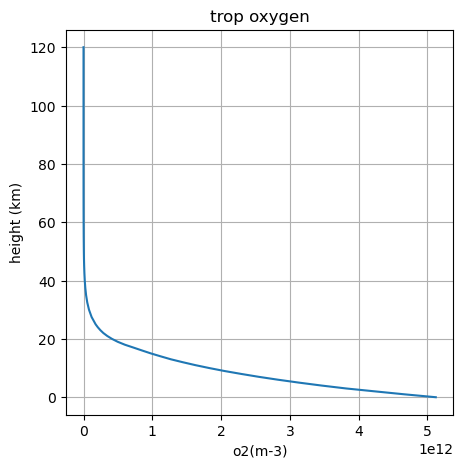

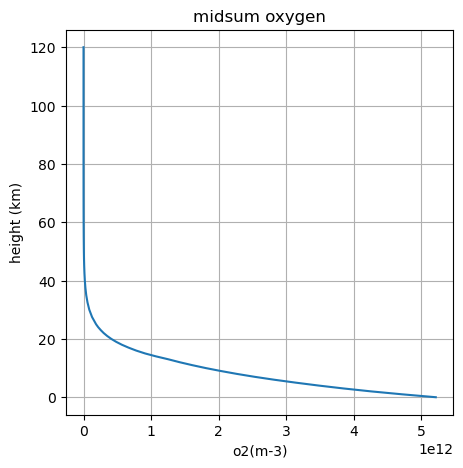

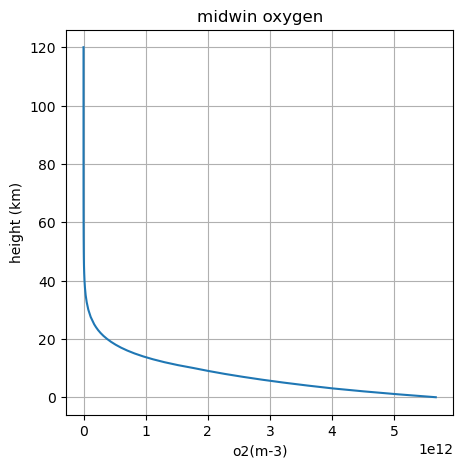

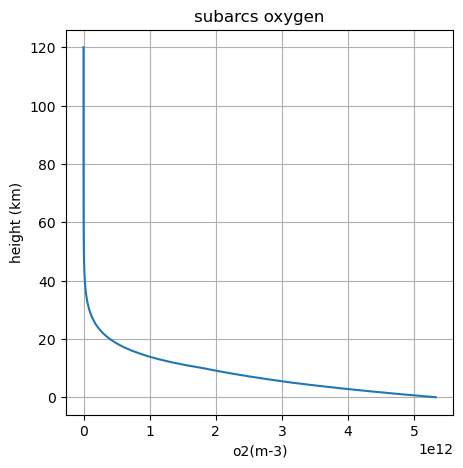

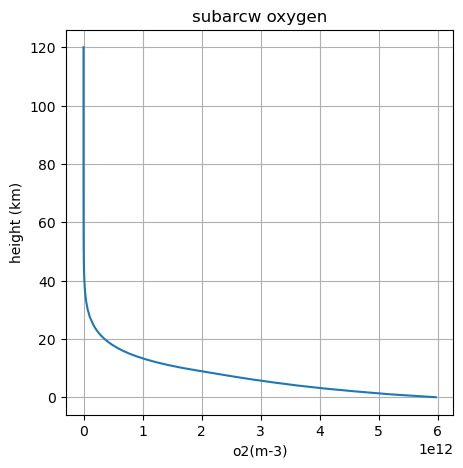

In [51]:
#oxygen -> water molecules with heavy 18-O isotopes in them condense more easily than normal water molecules, 
#air becomes progressively depleted in 18-O as it travels to high latitudes and becomes colder and drier.

gases(trop, trop['o2(m-3)'],'o2(m-3)', "trop oxygen")
gases(midsum, midsum['o2(m-3)'], 'o2(m-3)', 'midsum oxygen')
gases(midwin, midwin['o2(m-3)'], 'o2(m-3)', 'midwin oxygen')
gases(subarcs, subarcs['o2(m-3)'], 'o2(m-3)', 'subarcs oxygen')
gases(subarcw, subarcw['o2(m-3)'], 'o2(m-3)', 'subarcw oxygen')

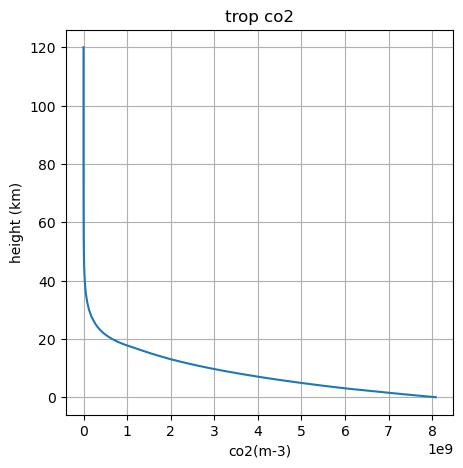

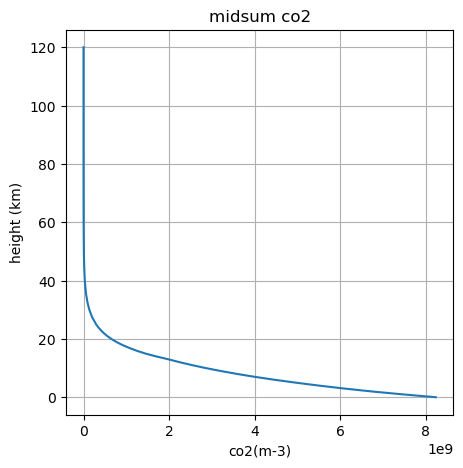

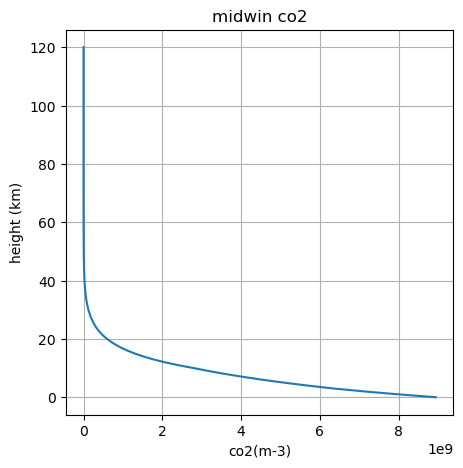

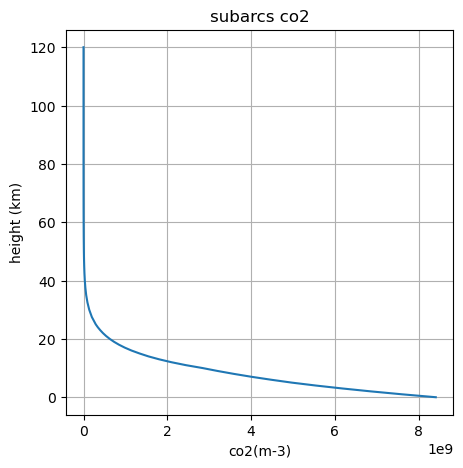

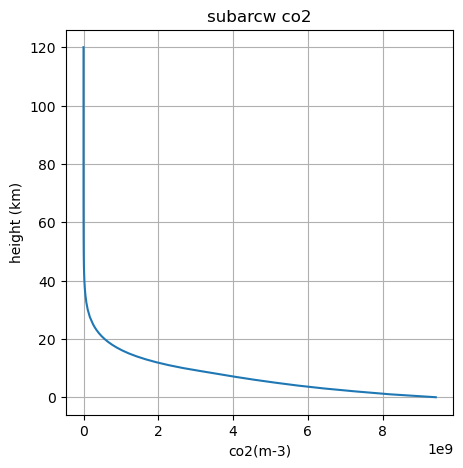

In [52]:
# co2 -> strong seasonal CO2 fluctuations throughout the Northern Hemisphere 
#and weaker fluctuations near the equator and in the Southern Hemisphere.

gases(trop, trop['co2(m-3)'],'co2(m-3)', "trop co2")
gases(midsum, midsum['co2(m-3)'], 'co2(m-3)', 'midsum co2')
gases(midwin, midwin['co2(m-3)'], 'co2(m-3)', 'midwin co2')
gases(subarcs, subarcs['co2(m-3)'], 'co2(m-3)', 'subarcs co2')
gases(subarcw, subarcw['co2(m-3)'], 'co2(m-3)', 'subarcw co2')

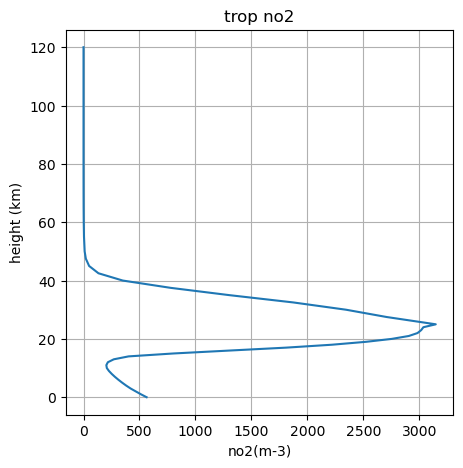

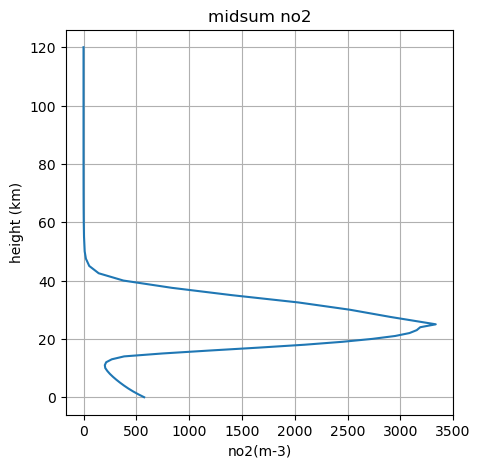

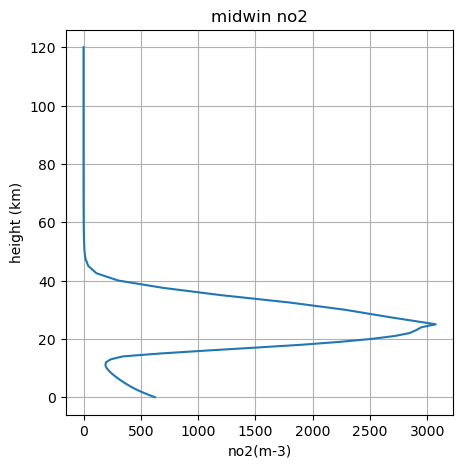

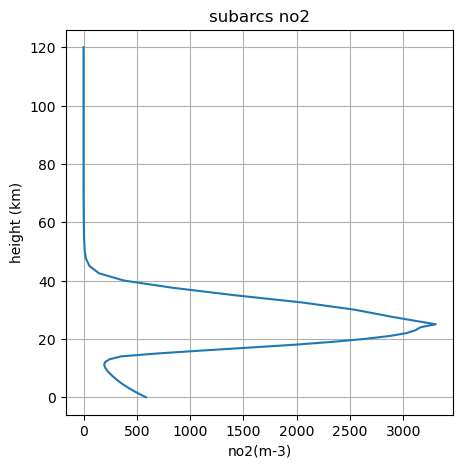

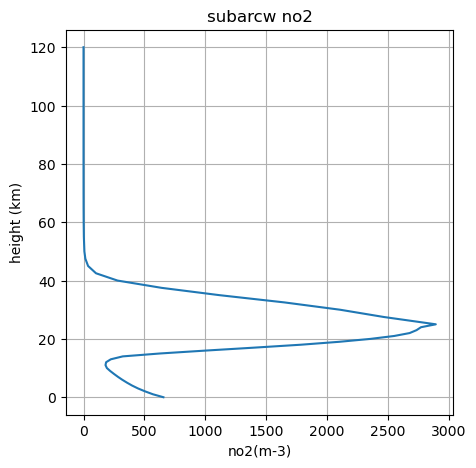

In [53]:
# no2 -> Winter levels are typically higher than those in summer

gases(trop, trop['no2(m-3)'],'no2(m-3)', "trop no2")
gases(midsum, midsum['no2(m-3)'], 'no2(m-3)', 'midsum no2')
gases(midwin, midwin['no2(m-3)'], 'no2(m-3)', 'midwin no2')
gases(subarcs, subarcs['no2(m-3)'], 'no2(m-3)', 'subarcs no2')
gases(subarcw, subarcw['no2(m-3)'], 'no2(m-3)', 'subarcw no2')

In [54]:
# fractions 
trop['h2o/air'] = trop['h2o(m-3)']/trop['air density(m-3)']
midsum['h2o/air'] = midsum['h2o(m-3)']/midsum['air density(m-3)']
midwin['h2o/air'] = midwin['h2o(m-3)']/midwin['air density(m-3)']
subarcs['h2o/air'] = subarcs['h2o(m-3)']/subarcs['air density(m-3)']
subarcw['h2o/air'] = subarcw['h2o(m-3)']/subarcw['air density(m-3)']

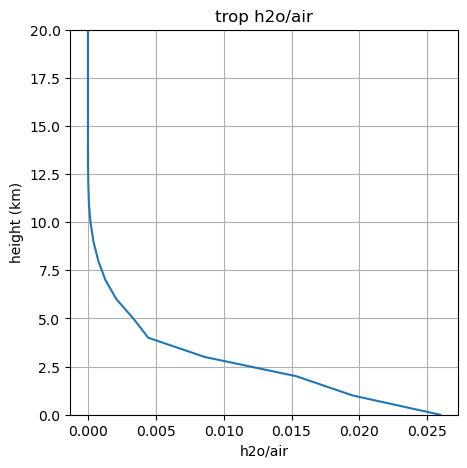

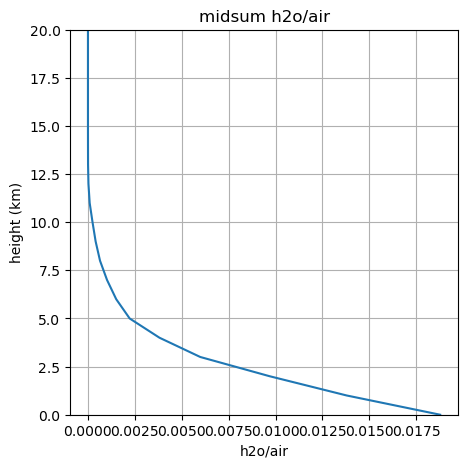

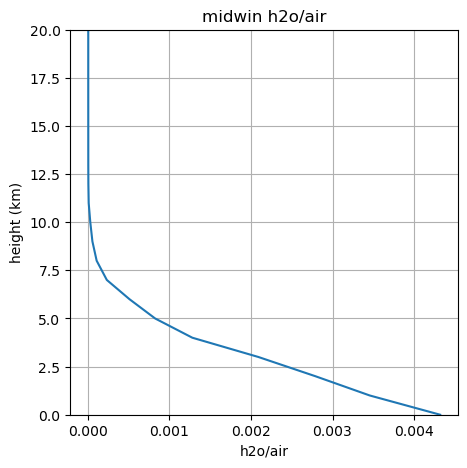

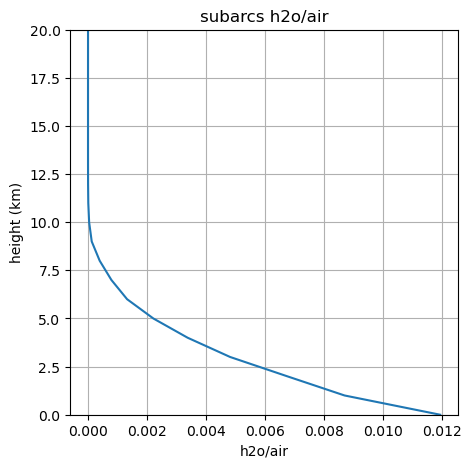

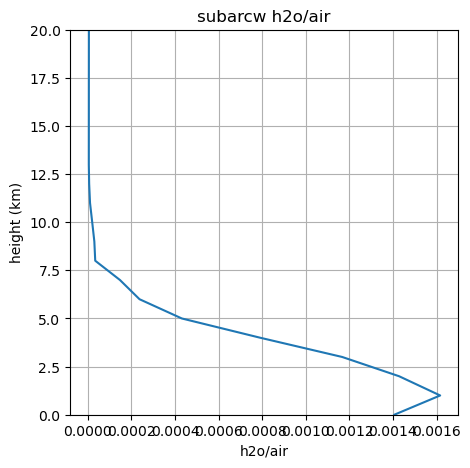

In [55]:
# h2o to water distribution
distribution(trop,trop['h2o/air'], 20,'h2o/air','trop h2o/air')
distribution(midsum,midsum['h2o/air'], 20,'h2o/air','midsum h2o/air')
distribution(midwin,midwin['h2o/air'], 20,'h2o/air','midwin h2o/air')
distribution(subarcs,subarcs['h2o/air'], 20,'h2o/air','subarcs h2o/air')
distribution(subarcw,subarcw['h2o/air'],20,'h2o/air','subarcw h2o/air')

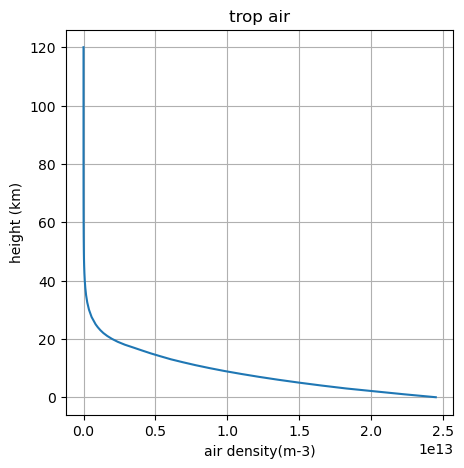

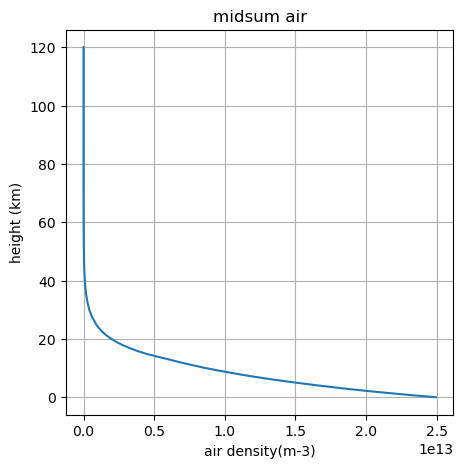

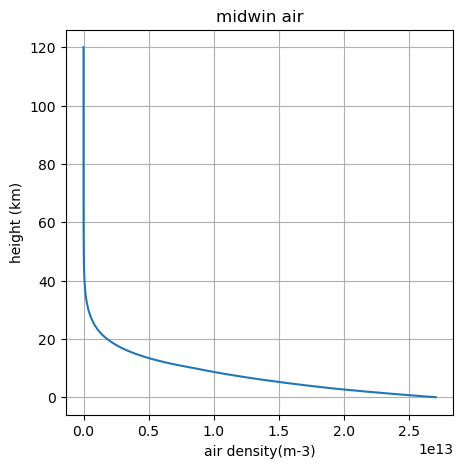

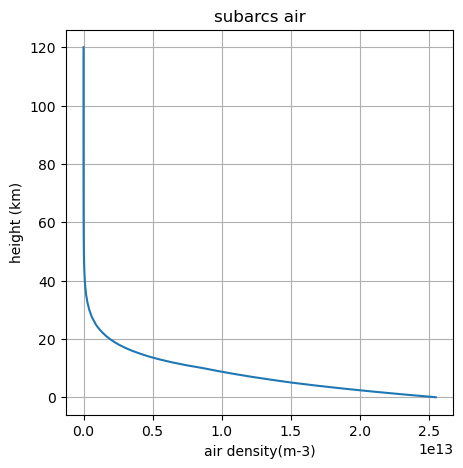

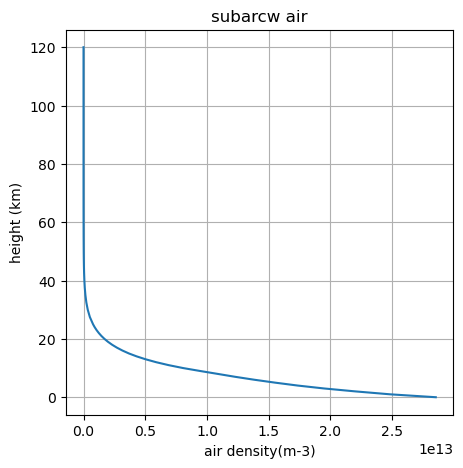

In [56]:
# air density -> that a weak dependency of density on latitude and season exists such that in summer at 200 km height
#the polar region density is 15% higher than at lower latitudes, while in winter the density decreases by 10% towards the pole

gases(trop, trop['air density(m-3)'],'air density(m-3)', "trop air")
gases(midsum, midsum['air density(m-3)'], 'air density(m-3)', 'midsum air')
gases(midwin, midwin['air density(m-3)'], 'air density(m-3)', 'midwin air')
gases(subarcs, subarcs['air density(m-3)'], 'air density(m-3)', 'subarcs air')
gases(subarcw, subarcw['air density(m-3)'], 'air density(m-3)', 'subarcw air')

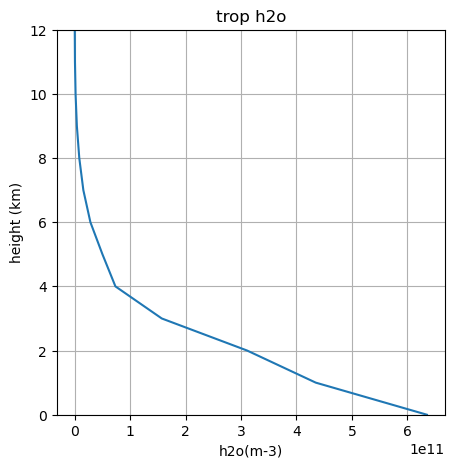

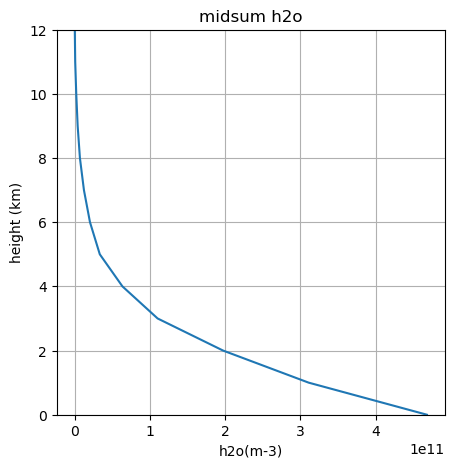

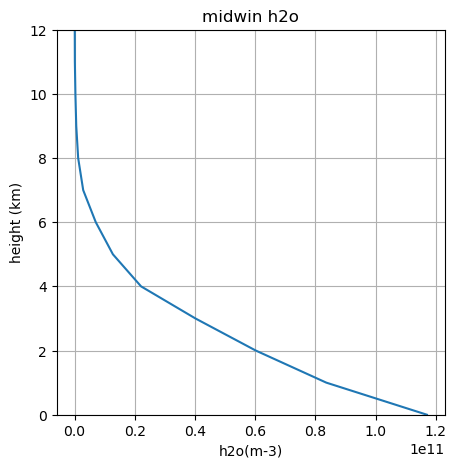

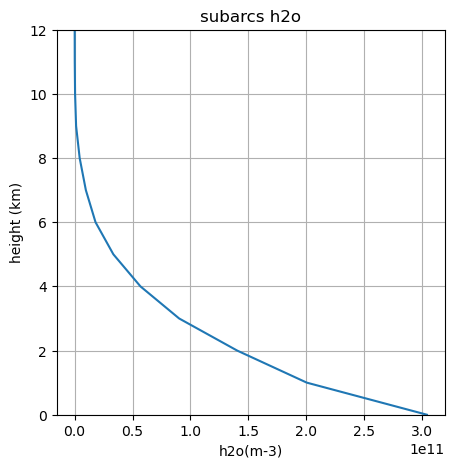

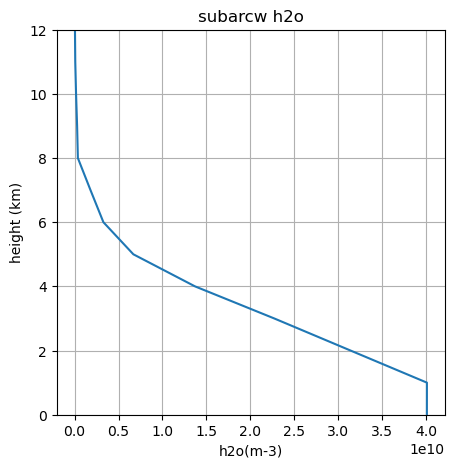

In [57]:
#water functions
distribution(trop,trop['h2o(m-3)'], 12,'h2o(m-3)','trop h2o')
distribution(midsum,midsum['h2o(m-3)'],12, 'h2o(m-3)', 'midsum h2o')
distribution(midwin,midwin['h2o(m-3)'], 12, 'h2o(m-3)','midwin h2o')
distribution(subarcs,subarcs['h2o(m-3)'], 12, 'h2o(m-3)','subarcs h2o')
distribution(subarcw,subarcw['h2o(m-3)'], 12, 'h2o(m-3)','subarcw h2o')

In [58]:
# this part of code is kindly borrowed from my colleague

percentage = []
for file in [trop, midsum, midwin, subarcs, subarcw]:
    total_percent = [var / integration(file)[0] for var in integration(file)[1:]]
    percentage.append(total_percent)

# percentage[0] is a list with the total percentage of o3, o2, h20, co2 and no2 for tropical, 
# percentage[1] is the same for mid_summer etc.

o3 = []; o2 = []; h2o = []; co2 = []; no2 = [];
for i in percentage:
    o3.append(i[0] * 100)
    o2.append(i[1] * 100)
    h2o.append(i[2] * 100)
    co2.append(i[3] * 100)
    no2.append(i[4] * 100)

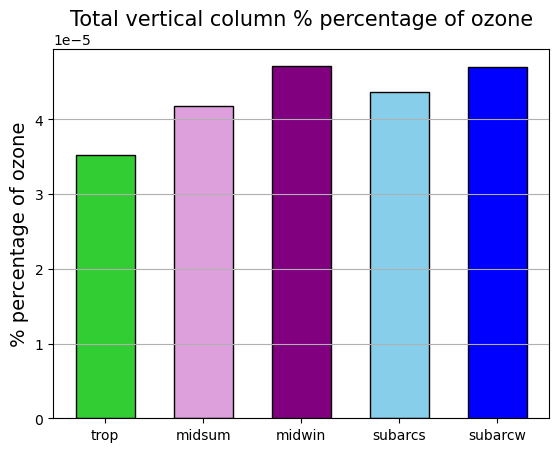

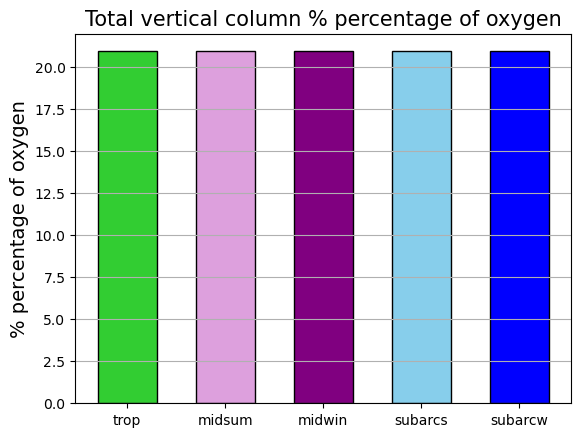

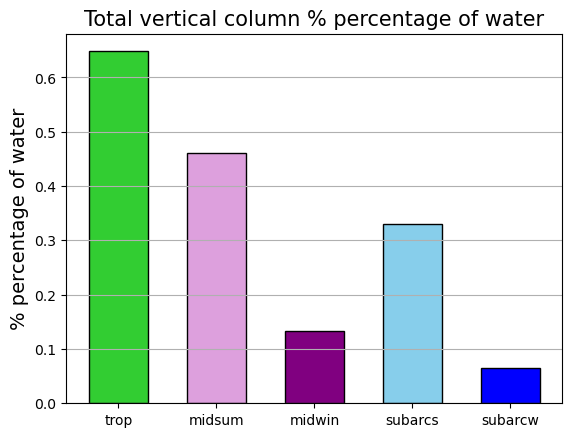

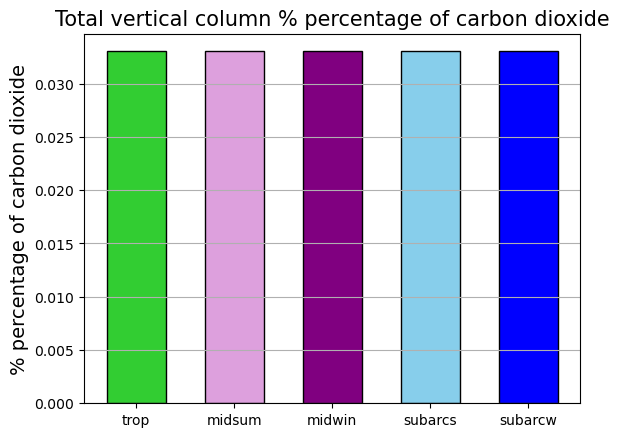

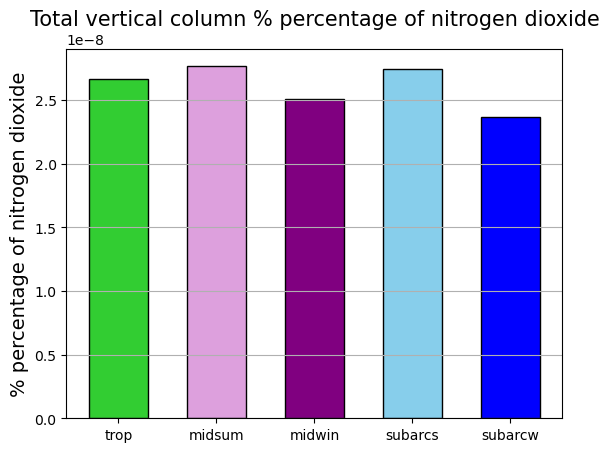

In [59]:
# bar plots
file_names = ['trop', 'midsum', 'midwin', 'subarcs', 'subarcw']
var_density_names = ['air density', 'ozone', 'oxygen', 'water', 'carbon dioxide', 'nitrogen dioxide']
colour = ['limegreen', 'plum', 'purple', 'skyblue', 'blue']

for count, var in enumerate([o3, o2, h2o, co2, no2]):
    plt.bar(file_names, var, color=colour, edgecolor ='black', width = 0.6)
    plt.ylabel(f'% percentage of {var_density_names[count+1]}',fontsize = 14)
    plt.title(f'Total vertical column % percentage of {var_density_names[count+1]}',fontsize=15)
    plt.grid(axis='y')
    plt.show()